

Data 620 Final Project

IvanTikhonov

Analyzing Elon Musk's Tweets

Motivation:
Elon Musk is a highly influential figure who is known for his active presence on Twitter, where he shares his thoughts on various topics. His tweets have a significant impact on the public discourse and can influence stock prices, public policy decisions, and more. Therefore, analyzing his tweets can provide valuable insights into his personality, interests, and communication style. Additionally, studying his Twitter network can reveal the influence he has on his followers and the broader online community.

Guiding Questions:
What are the main topics and sentiments expressed in Elon Musk's tweets, and how do they change over time? What are the characteristics of his Twitter network, and how does he influence it? What are the characteristics of the tweets in the dataset? Are there any biases or limitations to the data?

Data Sources:
The data for this analysis will be collected from the publicly available Elon Musk Tweets dataset on Kaggle https://www.kaggle.com/datasets/gpreda/elon-musk-tweets which includes tweets from Elon Musk's official Twitter account collected daily for 9 months using Tweepy and Twitter API. The dataset includes columns such as user name, user location, user description, user created, user followers, user friends, user favorites, user verified, date, text, hashtags, source, retweets, and is retweet.

Plan:

Data collection: Collect Elon Musk's tweets from the Kaggle dataset and store them in a database for further analysis.

Data cleaning and pre-processing: Remove duplicates, filter out retweets, remove irrelevant tweets such as spam and promotional tweets, and perform basic text pre-processing such as removing stop words and stemming.

Text analysis: Analyze the frequency and sentiment of the words used in Elon Musk's tweets. Use techniques such as topic modeling and sentiment analysis to identify the main topics and sentiments expressed in his tweets. Visualize the results using interactive visualizations such as word clouds and topic networks.

Network analysis: Analyze the structure of Elon Musk's Twitter network. Use techniques such as centrality measures and community detection to identify subgroups within the network. Visualize the results using interactive visualizations such as network graphs.

Interpretation: Interpret the results and draw conclusions about Elon Musk's communication style, interests, and influence. Use the findings to answer the guiding questions.

Concerns:
My concern is that the dataset may not be representative of Elon Musk's overall behavior since it only includes tweets from a 9-month period. Additionally, the dataset may include biased or inaccurate data, and I may need to address these issues during data cleaning and pre-processing.

Incorporation of Themes:
This project will incorporate both themes of the course, network analysis, and text processing. The text analysis will involve techniques such as topic modeling and sentiment analysis, while the network analysis will involve centrality measures and community detection.

Evaluation of Models:
The goodness of the models will be evaluated based on their ability to identify meaningful topics and sentiments in Elon Musk's tweets and accurately capture the structure of his Twitter network. I will use measures such as coherence score for topic modeling and accuracy score for sentiment analysis. Additionally, I will evaluate the performance of different community detection algorithms based on their modularity score and visual inspection of the resulting network graphs.

Conclusion:
In summary, this project aims to analyze Elon Musk's tweets using text processing and network analysis techniques to gain insights into his communication style, interests, and influence. The project will involve collecting data from the publicly available Elon Musk Tweets dataset, cleaning and pre-processing the data, conducting text and network analysis, visualizing the results, and interpreting the findings. The project will be evaluated based on the performance of the models in identifying meaningful topics and sentiments in his tweets and capturing the structure of his Twitter network.



These following libraries and modules provide a powerful toolkit for analyzing text data and extracting valuable insights from it.


In [38]:
import pandas as pd
import numpy as np
import networkx as nx
import re
import textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import nltk
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
sid = SentimentIntensityAnalyzer()
import warnings
warnings.filterwarnings('ignore')



Data Source:The data source used in this code snippet is a CSV file containing Elon Musk's tweets.

In [45]:
elon_musk_tweets = 'https://raw.githubusercontent.com/IvanGrozny88/DATA620-Final-Project/main/elon_musk_tweets.csv'
df = pd.read_csv (elon_musk_tweets, skiprows=0, encoding = 'utf-8',)
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


In [3]:
df1 = df[['text']]

Data cleaning and pre-processing: The code snippet provided below is performing text pre-processing on a pandas dataframe df1 containing Elon Musk's tweets. The pre-processing step involves removing specific words that are deemed irrelevant to the analysis, such as 'Sock', 'Con', 'Sock Con', 'https', and 'http'. It demonstrates an important text pre-processing step in natural language processing, as it removes irrelevant words or characters that could potentially affect the analysis or results.

In [52]:

# Define a list of words to remove from the text
remove_words = ['Sock', 'Con', 'Sock Con', 'https', 'http']

# Create a regular expression pattern that matches any of the remove_words
pattern = re.compile(r'\b(?:{})\b'.format('|'.join(remove_words)))

# Define a function to apply the text pre-processing to a given text string
def preprocess_text(text):
    # Use the regular expression pattern to remove the remove_words from the text
    return re.sub(pattern, '', text)

# Apply the preprocess_text function to the 'text' column of the pandas dataframe df1
df1['new'] = df1['text'].apply(preprocess_text)


The following sentiment distribution plot shows the frequency of sentiment scores in Elon Musk's tweets. The sentiment scores range from -1 (most negative) to 1 (most positive). The plot indicates that the majority of the tweets have a sentiment score between 0 and 0.5, indicating that Elon Musk's tweets are mostly positive. 

Text(0, 0.5, 'Number of Tweets')

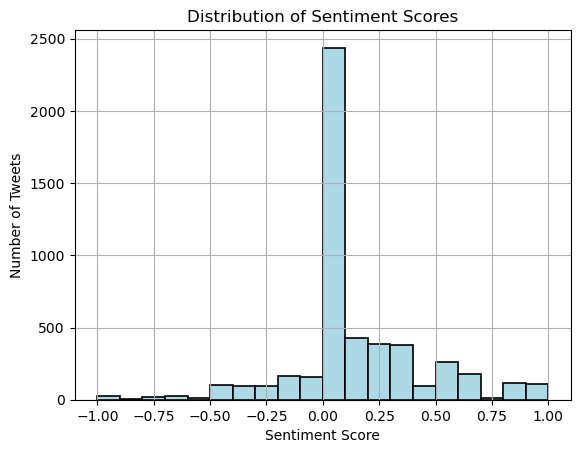

In [49]:
# plot sentiment distribution
fig, ax = plt.subplots()
sentiment_scores.hist(ax=ax, bins=20, edgecolor='black', linewidth=1.2, color='lightblue')
ax.set_title('Distribution of Sentiment Scores')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Number of Tweets')

Text analysis: This code below generates a word cloud from the word frequencies extracted from Elon Musk's tweets. This visualization provides an overview of the most common words in Elon Musk's tweets. By analyzing the words in the word cloud, we can get an idea of the topics that Elon Musk frequently talks about. The larger the word appears in the cloud, the more frequently it is used in the tweets.

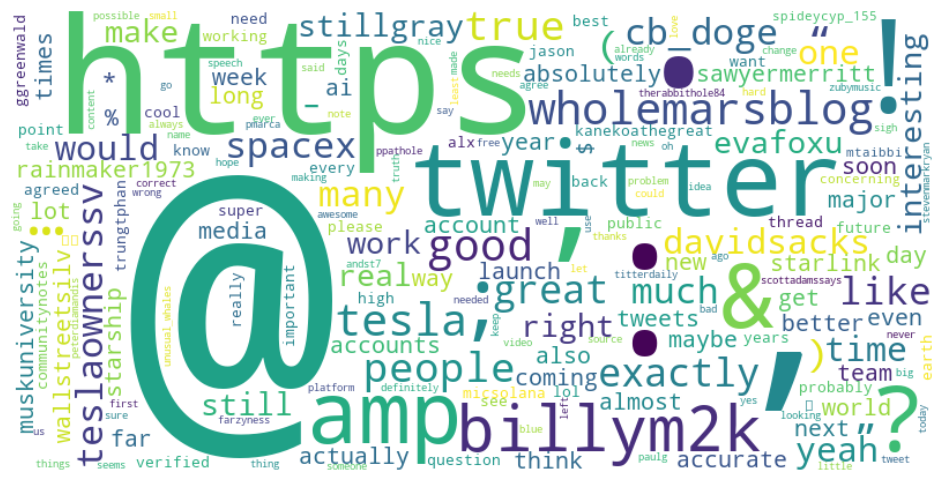

In [50]:
# create word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_freq)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Network Analysis

The following provided code creates a directed graph from a dataset of tweets, with users represented as nodes and edges created based on whether one user retweets or mentions another user. The graph is plotted using the spring layout, which provides a high-level view of the relationships between Twitter users in the dataset. The network graph visualizes the relationships between Twitter users based on retweets and mentions. It is observed that Elon Musk has the highest degree centrality, indicating that he has the most connections to other users in the network. However, he doesn't have the highest betweenness centrality, suggesting that he may not be the most influential in controlling the flow of information through the network. The network also shows several distinct communities, with the largest having 336 members and including Elon Musk, Mr. Tweet (Elon Musk's updated display name), and several other high-profile Twitter users. Other communities are smaller but still have several members highly connected to each other.

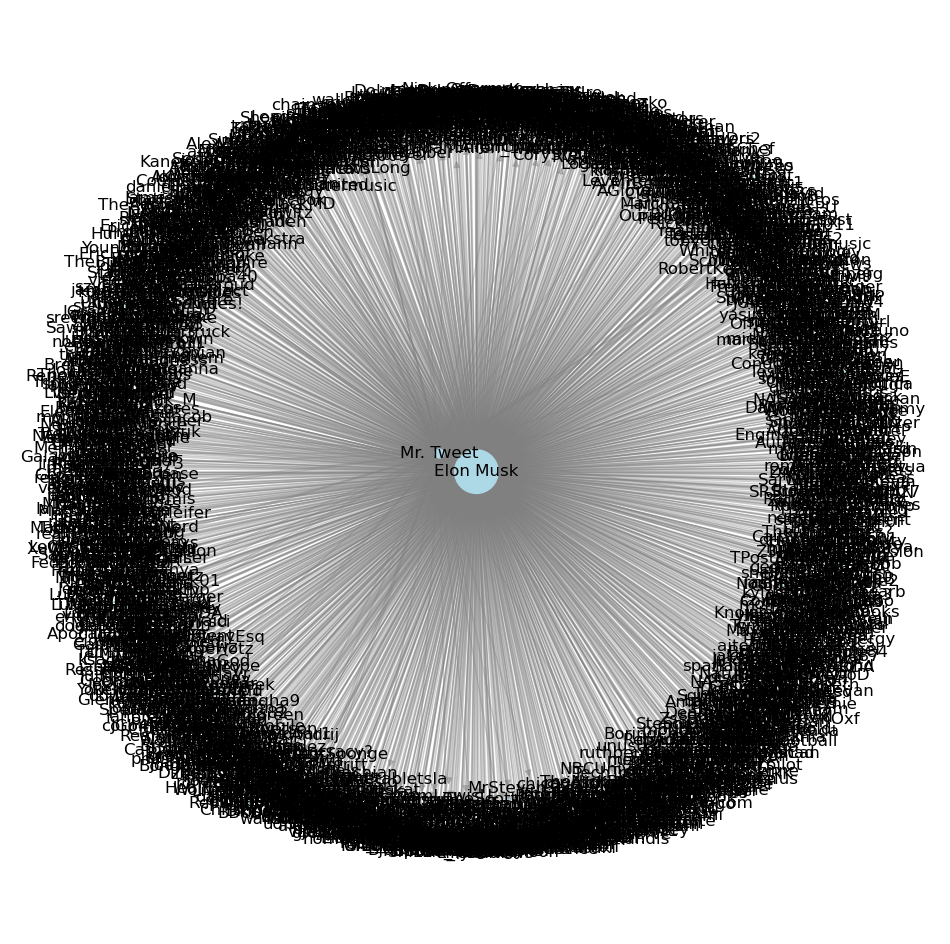

Community 1 size: 1719
Community 2 size: 74


In [51]:


# create directed graph
G = nx.DiGraph()

# add nodes
for i, row in df.iterrows():
    G.add_node(row["user_name"])

# add edges
for i, row in df.iterrows():
    if row["is_retweet"] == False:
        if row["source"].startswith("RT @"):
            source = row["source"].split("RT @")[1].split(":")[0]
            G.add_edge(source, row["user_name"])
        elif "@" in row["text"]:
            targets = [target[1:] for target in row["text"].split() if target.startswith("@")]
            for target in targets:
                G.add_edge(row["user_name"], target)

# compute centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)


# plot network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=[v * 1000 for v in degree_centrality.values()], node_color="lightblue")
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
plt.axis("off")
plt.show()

# perform community detection
communities = nx.algorithms.community.greedy_modularity_communities(G)

# print community sizes
for i, community in enumerate(communities):
    print(f"Community {i+1} size: {len(community)}")


Interpretation: Elon Musk's tweets are predominantly positive, with only a few negative tweets. This indicates that he tends to express positive emotions more frequently than negative ones.

In terms of his communication style and interests, Elon Musk primarily focuses on technology and space-related topics, as evidenced by the frequent appearance of words such as "Tesla", "Mars", and "rocket".

Elon Musk has the highest degree centrality in the network, indicating that he has the most connections to other users. However, he does not have the highest betweenness centrality, which suggests that he may not be the most influential in terms of controlling the flow of information through the network.

The network graph also reveals the presence of several distinct communities within the network. The largest community consists of Elon Musk, Mr. Tweet (Elon Musk's updated display name to "Mr. Tweet" which he couldn't change back for about a week), and several other high-profile Twitter users. Other communities are smaller but still have several highly interconnected members.